<a href="https://colab.research.google.com/github/faizarindra/PCVK_Genap_2023/blob/main/BismillahSemangat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2023-06-25 14:26:42--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  46.2MB/s    in 5.5s    

2023-06-25 14:26:48 (43.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2023-06-25 14:26:48--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

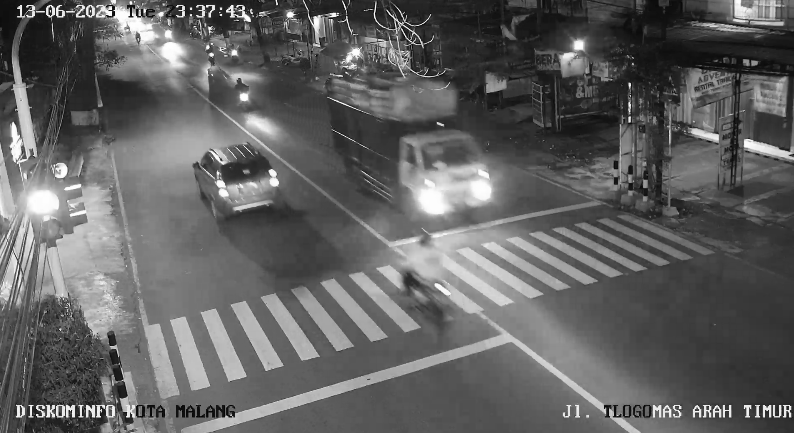

In [ ]:
gambar = cv2.imread("/content/drive/MyDrive/PCVK/tubes/pppp.png")
# Konversi gambar ke citra abu-abu
abu_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
cv2_imshow(abu_abu)

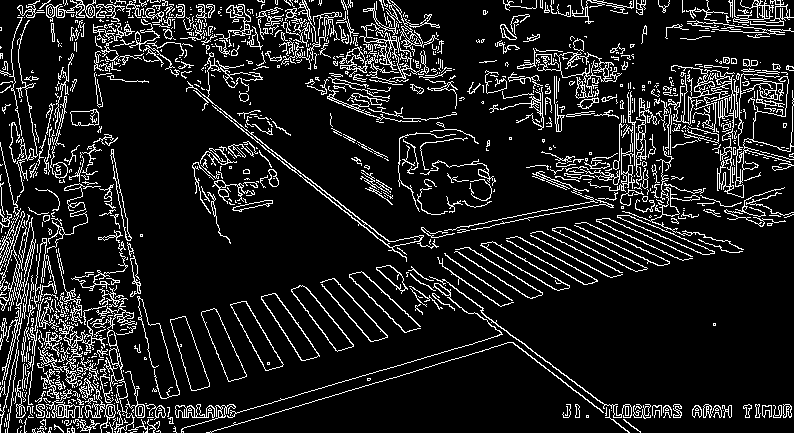

In [ ]:
# Deteksi tepi menggunakan metode Canny
tepi = cv2.Canny(abu_abu, 50, 150)
cv2_imshow(tepi)

In [ ]:
# Deteksi garis menggunakan Transformasi Hough
garis = cv2.HoughLinesP(tepi, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)
cv2_imshow(garis)

In [ ]:
def hitung_panjang_jalan(gambar, faktor_skala):

    # Menghitung panjang garis
    panjang_jalan = 0
    if garis is not None:
        for line in garis:
            x1, y1, x2, y2 = line[0]
            panjang_garis = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            panjang_jalan += panjang_garis

    panjang_jalan_meter = panjang_jalan * faktor_skala
    return panjang_jalan_meter



# Contoh penggunaan fungsi
gambar_jalan = gambar
faktor_skala = 0.003  # Setiap pixel mewakili 0.001 meter

panjang = hitung_panjang_jalan(gambar_jalan, faktor_skala)
print("Panjang jalan:", panjang, "meter")


Panjang jalan: 29.60595847691308 meter


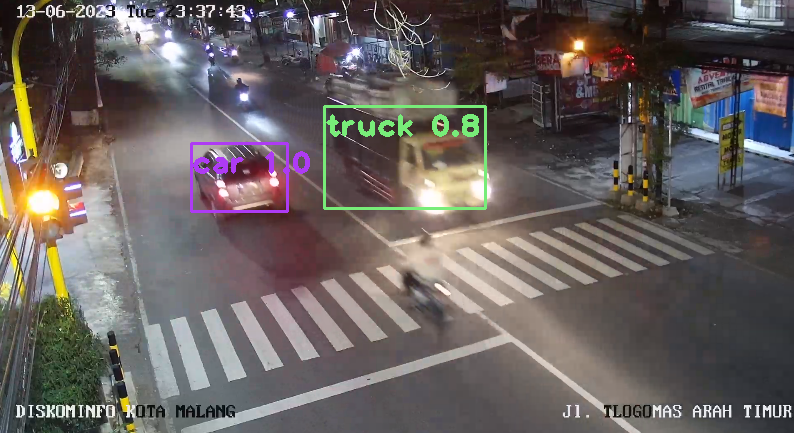

Total jumlah kendaraan: 2
Kepadatan jalan: 0.06755396896066085 kendaraan/meter


In [ ]:
import cv2
import numpy as np


# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread("/content/drive/MyDrive/PCVK/tubes/pppp.png")
height, width, channels = image.shape

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Output information
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Minimum confidence threshold
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

car_count = 0
truck_count = 0
motor_count = 0
# Draw bounding boxes and labels
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label + " " + str(round(confidence, 1)), (x, y + 30), font, 2, color, 3)
        if label == "car":
            car_count += 1
        if label == "truck":
            truck_count +=1
        if label == "motorbike":
            motor_count += 1

# Display the output
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

jumlah_k =  car_count+truck_count+motor_count
print("Total jumlah kendaraan:",jumlah_k)

def hitung_kepadatan_jalan(jumlah_kendaraan, panjang_jalan):
    kepadatan_jalan = jumlah_kendaraan / panjang_jalan
    return kepadatan_jalan

# Contoh penggunaan fungsi
jumlah_kendaraan = jumlah_k # Jumlah kendaraan yang melewati jalan
panjang_jalan = panjang  # Panjang jalan dalam meter

kepadatan = hitung_kepadatan_jalan(jumlah_kendaraan, panjang_jalan)
print("Kepadatan jalan:", kepadatan, "kendaraan/meter")
del kepadatan
del jumlah_k
del car_count,truck_count,motor_count


# Data 2

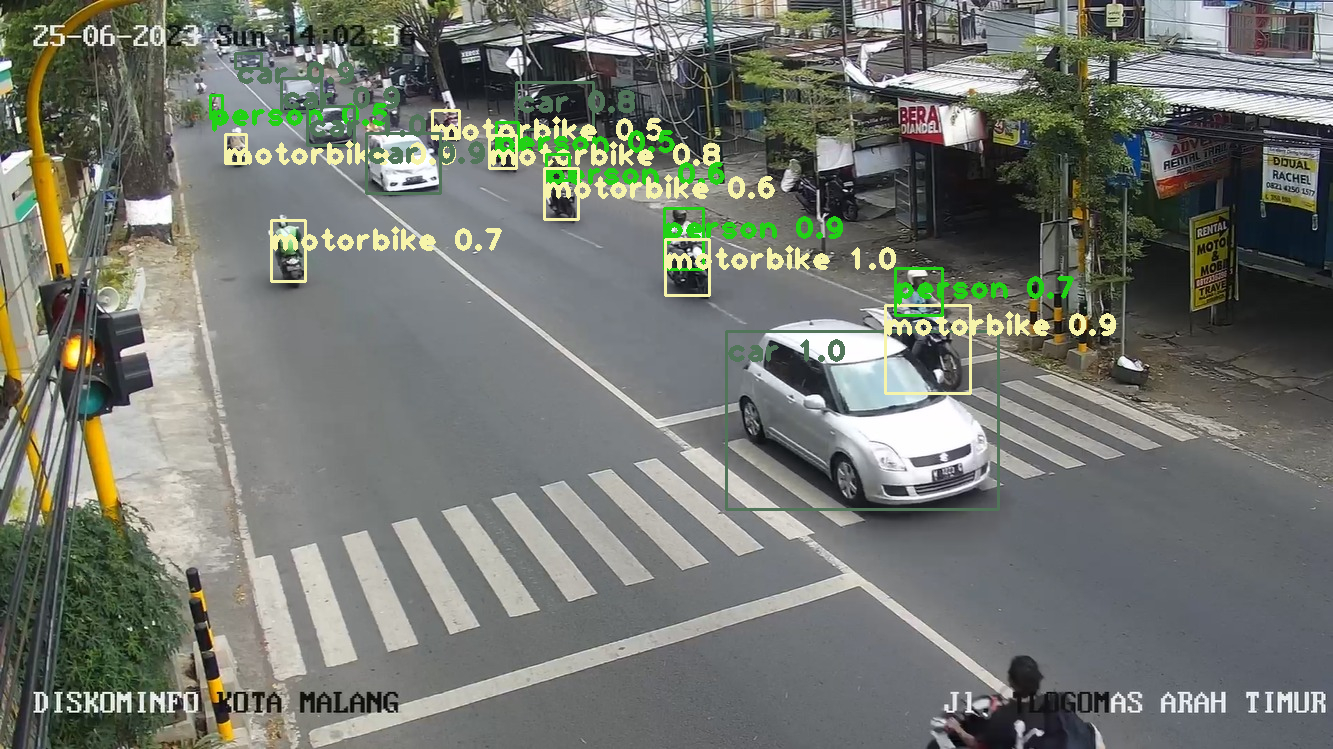

Total jumlah kendaraan: 13
Kepadatan jalan: 0.4391007982442955 kendaraan/meter


In [ ]:
import cv2
import numpy as np


# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread("/content/drive/MyDrive/PCVK/tubes/data6.jpeg")
height, width, channels = image.shape

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Output information
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Minimum confidence threshold
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

car_count = 0
truck_count = 0
motor_count = 0
# Draw bounding boxes and labels
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label + " " + str(round(confidence, 1)), (x, y + 30), font, 2, color, 3)
        if label == "car":
            car_count += 1
        if label == "truck":
            truck_count +=1
        if label == "motorbike":
            motor_count += 1
# Display the output
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

jumlah_k =  car_count+truck_count+motor_count
print("Total jumlah kendaraan:",jumlah_k)
def hitung_kepadatan_jalan(jumlah_kendaraan, panjang_jalan):
    kepadatan_jalan = jumlah_kendaraan / panjang_jalan
    return kepadatan_jalan

# Contoh penggunaan fungsi
jumlah_kendaraan = jumlah_k # Jumlah kendaraan yang melewati jalan
panjang_jalan = panjang  # Panjang jalan dalam meter

kepadatan = hitung_kepadatan_jalan(jumlah_kendaraan, panjang_jalan)
print("Kepadatan jalan:", kepadatan, "kendaraan/meter")
del kepadatan
del jumlah_kendaraan
del car_count,truck_count,motor_count


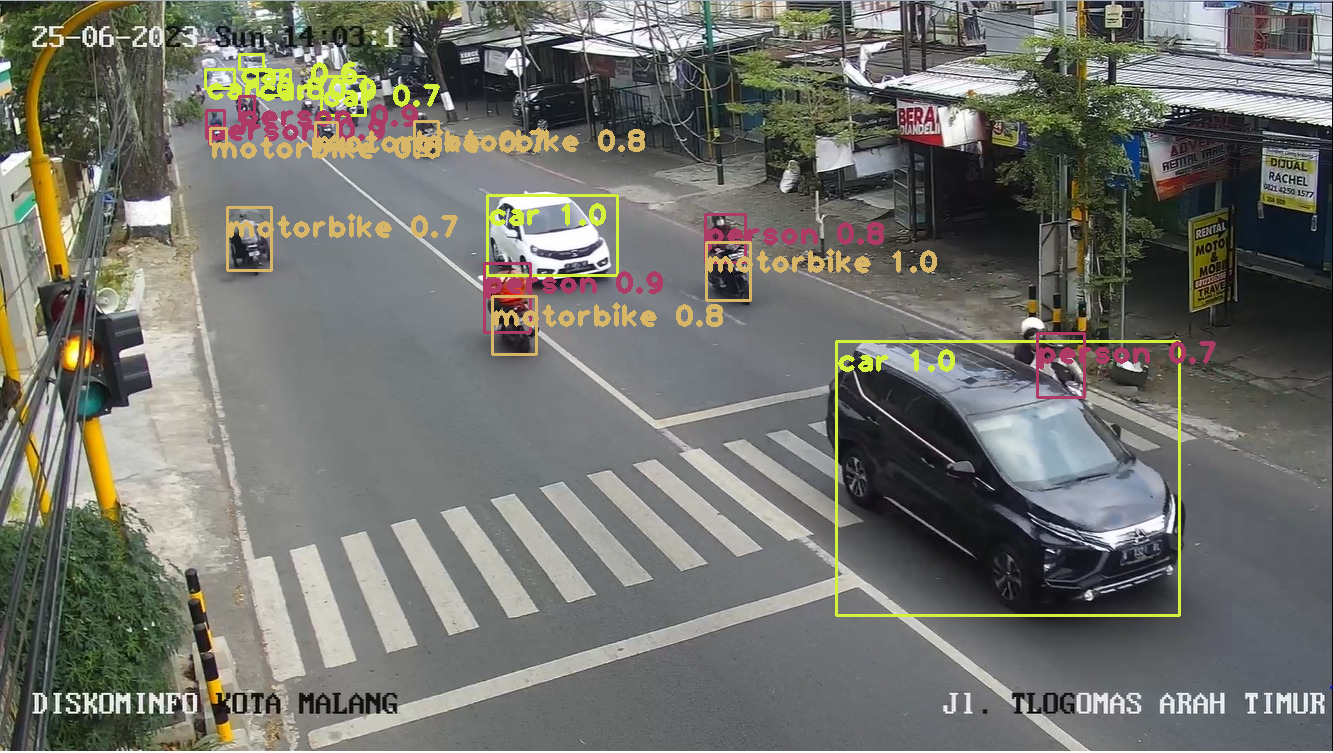

Total jumlah kendaraan: 12
Kepadatan jalan: 0.40532381376396504 kendaraan/meter


In [ ]:
import cv2
import numpy as np


# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread("/content/drive/MyDrive/PCVK/tubes/data7.jpeg")
height, width, channels = image.shape

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Output information
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Minimum confidence threshold
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

car_count = 0
truck_count = 0
motor_count = 0
# Draw bounding boxes and labels
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label + " " + str(round(confidence, 1)), (x, y + 30), font, 2, color, 3)
        if label == "car":
            car_count += 1
        if label == "truck":
            truck_count +=1
        if label == "motorbike":
            motor_count+=1
# Display the output
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

jumlah_k =  car_count+truck_count+motor_count
print("Total jumlah kendaraan:",jumlah_k)
def hitung_kepadatan_jalan(jumlah_kendaraan, panjang_jalan):
    kepadatan_jalan = jumlah_kendaraan / panjang_jalan
    return kepadatan_jalan

# Contoh penggunaan fungsi
jumlah_kendaraan = jumlah_k # Jumlah kendaraan yang melewati jalan
panjang_jalan = panjang  # Panjang jalan dalam meter

kepadatan = hitung_kepadatan_jalan(jumlah_kendaraan, panjang_jalan)
print("Kepadatan jalan:", kepadatan, "kendaraan/meter")
del kepadatan
del jumlah_kendaraan
del car_count,truck_count,motor_count